<a href="https://colab.research.google.com/github/Susheel06/assignment1/blob/main/BigDataAnalytics_ASSIGNMENT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [830]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import requests

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import StandardScaler

!git clone https://github.com/Susheel06/assignment1.git

fatal: destination path 'assignment1' already exists and is not an empty directory.


### **Data loading and Pre-Processing using EDA**

In [831]:
df = pd.read_csv('/content/assignment1/winequality-red.csv')
df1 = pd.read_csv('/content/assignment1/winequality-red.csv')
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [832]:
y_train = df[['quality']]
y_train.head()
df.drop(columns = ['quality'], axis = 1, inplace = True)

x = pd.DataFrame(data = df.values, columns= df.columns)
print(x.shape)

df.insert(loc=len(df.columns),column='quality', value= y_train)
df.head()

(1599, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [833]:
train, test = tts(df, test_size = 0.3, shuffle= False)
x, dummy = tts(x, test_size = 0.3, shuffle= False)

train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


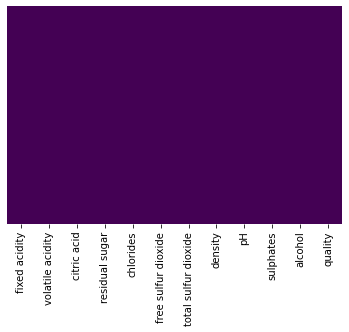

In [834]:
plt.figure()
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [835]:
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,8.678105,0.521649,0.295979,2.579267,0.089721,15.207328,47.179625,0.997167,3.296461,0.665532,10.334227,5.650581
std,1.795471,0.178961,0.198815,1.277500,0.048806,10.085498,34.210922,0.001853,0.156366,0.178248,1.074463,0.810473
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.400000,0.390000,0.120000,1.900000,0.072000,7.000000,22.000000,0.996200,3.190000,0.560000,9.500000,5.000000
50%,8.300000,0.510000,0.290000,2.250000,0.081000,13.000000,38.000000,0.997200,3.300000,0.620000,10.000000,6.000000
75%,9.700000,0.630000,0.470000,2.700000,0.092500,21.000000,63.000000,0.998200,3.390000,0.730000,11.000000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003200,3.900000,2.000000,14.900000,8.000000


In [836]:
y_train = train[['quality']]
x_train = train.drop(columns = ['quality'], axis = 1)

y_test = test[['quality']]
x_test = test.drop(columns = ['quality'], axis = 1)

y_train.head()

print(x_train.shape)
print(y_train.shape)

(1119, 11)
(1119, 1)


 ### **Question 1**

In [837]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

In [838]:
y_result = model.predict(x_train)
y_result = pd.DataFrame(data = model.predict(x_train), dtype=int)
y_result.head()

,0
0,5
1,5
2,5
3,5
4,5


In [839]:
from sklearn.metrics import mean_squared_error as mse
sse = mse(y_train, y_result)*y_train.shape[0]

print('Sum of squared error: %.2f' % sse)

Sum of squared error: 776.00


In [840]:
x_result = pd.DataFrame(data = x_train, columns= x_train.columns)
x_result.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [841]:
print(x.shape)
print(x_train.shape)
x.head()

(1119, 11)
(1119, 11)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [842]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [843]:
from sklearn.linear_model import LinearRegression
import numpy as np

x_train1 = x_train['alcohol']
x_train1 = np.reshape(x_train1.values, (1119,1))

print(x_train1.shape)
print(y_train.shape)
model = LinearRegression().fit(x_train1, y_train)

y_result = pd.DataFrame(data = model.predict(x_train1), dtype=int)

(1119, 1)
(1119, 1)


In [844]:
y_result

,0
0,5
1,5
2,5
3,5
4,5
...,...
1114,6
1115,6
1116,6
1117,6


In [845]:
result = pd.DataFrame(data= x, columns=['alcohol'])
result.insert(loc=1, column='quality', value= np.array(y_result.values))
result.drop_duplicates(subset= 'quality', inplace=True)
result.sort_values(by='quality', ascending=True, axis=0, inplace=True)
result.head(10)

,alcohol,quality
517,8.4,4
0,9.4,5
45,13.1,6
142,14.0,7


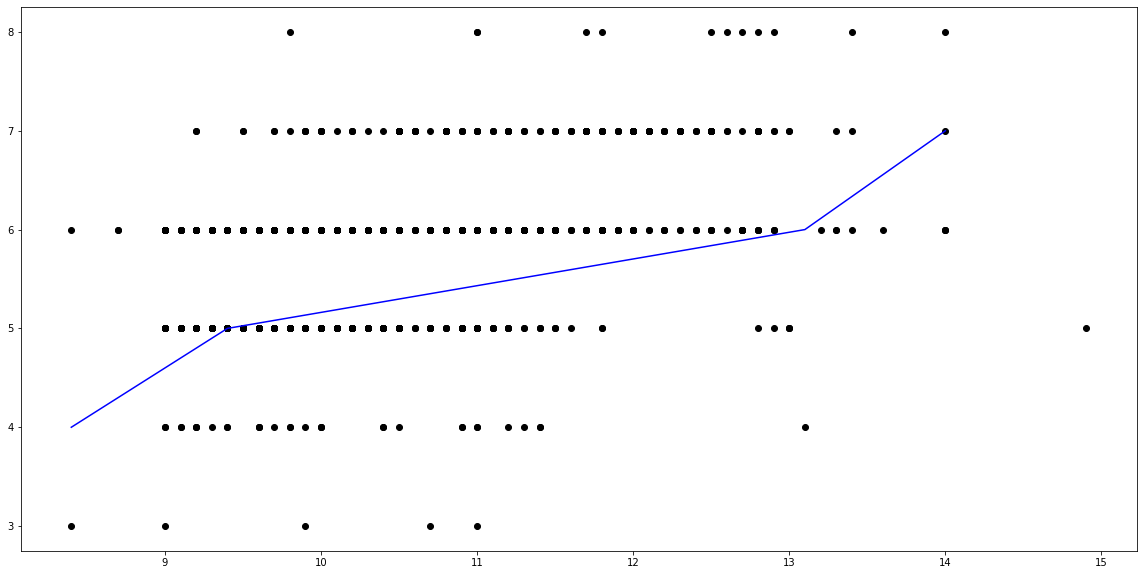

In [846]:
# x_result.insert(loc=0, column ='quality', value= y_result)
# x_result.drop_duplicates(subset='quality', inplace=True)
# x_result.dropna(axis=0, inplace = True)

# print(y_train.shape)
# print(x_train.shape)


# x.head()


plt.figure(figsize=(20, 10))
plt.scatter(x_train1, y_train,  color='black')
plt.plot(result['alcohol'], result['quality'], color='blue')
plt.show()

In [847]:
x_result.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


 ### **Question 2 AND Question 3**

In [848]:
y_train.loc[y_train['quality'] < 7] = 0
y_train.loc[y_train['quality'] >= 7] = 1

y_train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._seti

,quality
0,0
1,0
2,0
3,0
4,0


In [849]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression().fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [850]:
y_result = model_logistic.predict(x_train)
y_result = pd.DataFrame(data = model_logistic.predict(x_train), dtype=int)

In [851]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.66
F1_Score: 0.45
Precision: 0.67
Recall: 0.34
Sensitivity: 0.97
Specificity: 0.34


In [852]:
from sklearn.linear_model import LinearRegression

model_lr_classification = LinearRegression().fit(x_train, y_train)

In [853]:
y_result = model_lr_classification.predict(x_train)
y_result = pd.DataFrame(data = model_lr_classification.predict(x_train), dtype=int)

In [854]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.50
F1_Score: 0.00
Precision: 0.00
Recall: 0.00
Sensitivity: 1.00
Specificity: 0.00


In [855]:
from sklearn import svm

clf = svm.SVC(kernel='poly')
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [856]:
y_result = clf.predict(x_train)
y_result = pd.DataFrame(data = clf.predict(x_train), dtype=int)

In [857]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.51
F1_Score: 0.02
Precision: 1.00
Recall: 0.01
Sensitivity: 1.00
Specificity: 0.01


In [858]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [859]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

y_train = df1[['quality']]
y_train.head()

df1.drop(columns = ['quality'], axis = 1, inplace = True)

df1 = pd.DataFrame(data = scaler.fit_transform(df1), columns=df1.columns)

df1.insert(loc=len(df1.columns),column='quality', value= y_train)
df1.head()

train, test = tts(df1, test_size = 0.3, shuffle=True)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
869,0.265487,0.349315,0.03,0.075342,0.113523,0.366197,0.130742,0.419236,0.551181,0.185629,0.384615,6
122,0.238938,0.393836,0.00,0.109589,0.105175,0.028169,0.024735,0.582232,0.590551,0.113772,0.123077,5
1404,0.300885,0.260274,0.39,0.116438,0.116861,0.154930,0.141343,0.618943,0.543307,0.173653,0.353846,6
1115,0.212389,0.390411,0.07,0.109589,0.131886,0.197183,0.053004,0.414831,0.503937,0.161677,0.446154,6
957,0.433628,0.171233,0.52,0.075342,0.126878,0.154930,0.159011,0.444934,0.433071,0.149701,0.415385,6


In [860]:
y_train = train[['quality']]
x_train = train.drop(columns = ['quality'], axis = 1)

y_test = test[['quality']]
x_test = test.drop(columns = ['quality'], axis = 1)

y_train.loc[y_train['quality'] < 7] = 0
y_train.loc[y_train['quality'] >= 7] = 1

      fixed acidity  volatile acidity  ...  sulphates   alcohol
869        0.265487          0.349315  ...   0.185629  0.384615
122        0.238938          0.393836  ...   0.113772  0.123077
1404       0.300885          0.260274  ...   0.173653  0.353846
1115       0.212389          0.390411  ...   0.161677  0.446154
957        0.433628          0.171233  ...   0.149701  0.415385

[5 rows x 11 columns]
      quality
869         0
122         0
1404        0
1115        0
957         0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr

In [861]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [862]:
y_result = clf_nb.predict(x_train)
y_result = pd.DataFrame(data = clf_nb.predict(x_train), dtype=int)
y_result.head()

,0
0,0
1,0
2,0
3,0
4,1


In [863]:
print('Accuracy: %.2f' % roc_auc_score(y_train, y_result))
print('F1_Score: %.2f' % f1_score(y_train, y_result))
print('Precision: %.2f' % precision_score(y_train, y_result))
print('Recall: %.2f' % recall_score(y_train, y_result))

confus_mat = confusion_matrix(y_train, y_result)


l1 = (confus_mat[0][0])/(confus_mat[0][0] + confus_mat[0][1])
print('Sensitivity: %0.2f' % l1)

l2 = (confus_mat[1][1])/(confus_mat[1][0] + confus_mat[1][1])
print('Specificity: %0.2f' % l2)

Accuracy: 0.77
F1_Score: 0.52
Precision: 0.42
Recall: 0.69
Sensitivity: 0.85
Specificity: 0.69


# QUESTION 4

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
x_train = pca.fit_transform(x_train)